# Baseline Scenario

In [3]:
# import os

# # Measure Package 0: Baseline
# menu_mp = 0
# input_mp = 'baseline'

# # Get the current working directory of the project
# project_root = os.path.abspath(os.getcwd())
# print(f"Project root directory: {project_root}")

# # Relative path to the file from the project root
# relative_path = r"tare_model_scenario_baseline_preIRA_v3.1.ipynb"

# # Construct the absolute path to the file
# file_path = os.path.join(project_root, relative_path)
# print(f"File path: {file_path}")

# # Run the notebook and import variables
# if os.path.exists(relative_path):
#     get_ipython().run_line_magic('run', f'-i "{relative_path}"')
#     print("Baseline Scenario - Model Run Complete")
# else:
#     print(f"File not found: {relative_path}")

Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_scenario_baseline_preIRA_v3.1.ipynb
Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_functions_v3.1.ipynb
Loaded All TARE Model Functions
Result outputs will be exported here: c:\Users\14128\Research\cmu-tare-model\output_results

-------------------------------------------------------------------------------------------------------
Welcome to the Trade-off Analysis of residential Retrofits for energy Equity Tool (TARE Model)
Let's start by reading the data from the NREL EUSS Database.

Make sure that the zipped folders stay organized as they are once unzipped.
If changes are made to the file path, then the program will not run properly.
-------------------------------------------------------------------------------------------------------

--------------------------------------------------

C:\Users\14128\AppData\Local\Temp\ipykernel_20892\1360976789.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_margDamages_gridDecarb[column_name] = None



-------------------------------------------------------------------------------------------------------
Calculate Emissions Factors: FOSSIL FUELS
-------------------------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------------------------
Step 5: Calculate End-use specific marginal damages
-------------------------------------------------------------------------------------------------------
      
-------------------------------------------------------------------------------------------------------
Baseline Marginal Damages: WHOLE-HOME
-------------------------------------------------------------------------------------------------------

End-use category: heating
End-use category: waterHeating
End-use category: clothesDrying
End-use category: cooking

-------------------------------------------------------------------------------------------------------
Private Persp

# Moderate Retrofit Scenarios (MP9)
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate-BAU: Moderate Retrofit (MP9), BAU Costs, Current Electricity Grid
    - Moderate-IRA: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate-IRA-Decarb: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid

## Dataframe for Electric Resistance Cooking (MP7)

In [4]:
# Measure Package 7
menu_mp = 7
input_mp = 'upgrade07'

filename = "upgrade07_metadata_and_annual_results.csv"
relative_path = os.path.join(r"euss_data\\resstock_amy2018_release_1.1\\state", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

# Fix DtypeWarning error in columns 'in.neighbors' and 'in.geometry_stories_low_rise'
columns_to_string = {11: str, 61: str, 121: str, 103: str, 128: str, 129: str}
df_euss_am_mp7 = pd.read_csv(file_path, dtype=columns_to_string)
occupancy_filter = df_euss_am_mp7['in.vacancy_status'] == 'Occupied'
df_euss_am_mp7 = df_euss_am_mp7.loc[occupancy_filter]

# Filter for single family home building type
house_type_list = ['Single-Family Attached', 'Single-Family Detached']
house_type_filter = df_euss_am_mp7['in.geometry_building_type_recs'].isin(house_type_list)
df_euss_am_mp7 = df_euss_am_mp7.loc[house_type_filter]

Retrieved data for filename: upgrade07_metadata_and_annual_results.csv
Located at filepath: c:\Users\14128\Research\cmu-tare-model\euss_data\\resstock_amy2018_release_1.1\\state\upgrade07_metadata_and_annual_results.csv




In [5]:
# National Level 
if menu_state == 'N':
    print("You chose to analyze all of the United States.")
    input_state = 'National'

# Filter down to state or city
else:
    print(f"You chose to filter for: {input_state}")
    state_filter = df_euss_am_mp7['in.state'].eq(input_state)
    df_euss_am_mp7 = df_euss_am_mp7.loc[state_filter]

    # Filter for the entire selected state
    if menu_city == 'N':
        print(f"You chose to analyze all of state: {input_state}")
        
    # Filter to a city within the selected state
    else:
        print(f"You chose to filter for: {input_state}, {input_cityFilter}")
        city_filter = df_euss_am_mp7['in.city'].eq(f"{input_state}, {input_cityFilter}")
        df_euss_am_mp7 = df_euss_am_mp7.loc[city_filter]

# Display the filtered dataframe
df_euss_am_mp7

You chose to filter for: PA
You chose to analyze all of state: PA


,bldg_id,upgrade,weight,applicability,in.sqft,in.ahs_region,in.ashrae_iecc_climate_zone_2004,in.ashrae_iecc_climate_zone_2004_2_a_split,in.bathroom_spot_vent_hour,in.bedrooms,...,out.emissions_reduction.propane.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions_reduction.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.emissions_reduction.all_fuels.lrmer_low_re_cost_15_2025_start.co2e_kg,out.emissions_reduction.all_fuels.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions_reduction.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg,upgrade.clothes_dryer,upgrade.cooking_range,upgrade.hvac_cooling_efficiency,upgrade.hvac_heating_efficiency,upgrade.water_heater_efficiency
410846,119,7,242.131013,True,2152.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour1,4,...,0.000000,4367.397352,2552.828291,2985.641141,2356.289439,"Electric, 100% Usage","Electric, 100% Usage",Heat Pump,"ASHP, SEER 15, 9.0 HSPF","Electric Heat Pump, 66 gal, 3.35 UEF"
410847,122,7,242.131013,True,2176.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour18,4,...,0.000000,10479.768179,6954.371623,7797.415226,6648.492515,NaN,NaN,Heat Pump,"ASHP, SEER 15, 9.0 HSPF","Electric Heat Pump, 66 gal, 3.35 UEF"
410848,150,7,242.131013,False,1690.0,Non-CBSA Middle Atlantic,5A,5A,Hour2,4,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
410849,153,7,242.131013,True,2176.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour6,3,...,0.000000,11048.097647,6200.439415,7363.122758,5775.168899,NaN,NaN,Heat Pump,"ASHP, SEER 15, 9.0 HSPF","Electric Heat Pump, 50 gal, 3.45 UEF"
410850,162,7,242.131013,True,2663.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour8,5,...,0.000000,12947.903971,8666.012863,9676.629818,8324.377523,NaN,NaN,Heat Pump,"ASHP, SEER 15, 9.0 HSPF","Electric Heat Pump, 80 gal, 3.45 UEF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433889,549882,7,242.131013,True,1202.0,Non-CBSA Middle Atlantic,5A,5A,Hour5,2,...,0.000000,5212.871757,3310.560695,3739.637305,3185.908976,NaN,NaN,Heat Pump,"MSHP, SEER 15, 9.0 HSPF, Max Load","Electric Heat Pump, 50 gal, 3.45 UEF"
433891,549915,7,242.131013,False,2176.0,Non-CBSA Middle Atlantic,5A,5A,Hour0,5,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
433892,549937,7,242.131013,True,885.0,Non-CBSA Middle Atlantic,5A,5A,Hour20,4,...,0.000000,4636.242910,1673.632015,2257.364571,1154.203887,"Electric, 120% Usage","Electric, 120% Usage",Heat Pump,"ASHP, SEER 15, 9.0 HSPF","Electric Heat Pump, 66 gal, 3.35 UEF"
433893,549963,7,242.131013,True,1690.0,Non-CBSA Middle Atlantic,5A,5A,Hour13,3,...,0.000000,4903.857419,609.743358,1488.137683,-84.117798,NaN,NaN,Heat Pump,"ASHP, SEER 15, 9.0 HSPF","Electric Heat Pump, 50 gal, 3.45 UEF"


## Dataframe used for other end-uses (MP9)

In [6]:
# Measure Package 9
menu_mp = 9
input_mp = 'upgrade09'
scenario_name = 'Moderate-BAU'
cost_scenario = 'BAU Costs'
grid_scenario = 'Current Electricity Grid'

print(f"""
-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario {scenario_name}:
Moderate Retrofit: Measure Package {menu_mp}
{cost_scenario}
{grid_scenario}
-------------------------------------------------------------------------------------------------------
""")

filename = "upgrade09_metadata_and_annual_results.csv"
relative_path = os.path.join(r"euss_data\\resstock_amy2018_release_1.1\\state", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

# Fix DtypeWarning error in columns 'in.neighbors' and 'in.geometry_stories_low_rise'
columns_to_string = {11: str, 61: str, 121: str, 103: str, 128: str, 129: str}
df_euss_am_mp9 = pd.read_csv(file_path, dtype=columns_to_string)
occupancy_filter = df_euss_am_mp9['in.vacancy_status'] == 'Occupied'
df_euss_am_mp9 = df_euss_am_mp9.loc[occupancy_filter]

# Filter for single family home building type
house_type_list = ['Single-Family Attached', 'Single-Family Detached']
house_type_filter = df_euss_am_mp9['in.geometry_building_type_recs'].isin(house_type_list)
df_euss_am_mp9 = df_euss_am_mp9.loc[house_type_filter]


-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario Moderate-BAU:
Moderate Retrofit: Measure Package 9
BAU Costs
Current Electricity Grid
-------------------------------------------------------------------------------------------------------

Retrieved data for filename: upgrade09_metadata_and_annual_results.csv
Located at filepath: c:\Users\14128\Research\cmu-tare-model\euss_data\\resstock_amy2018_release_1.1\\state\upgrade09_metadata_and_annual_results.csv




In [7]:
# National Level 
if menu_state == 'N':
    print("You chose to analyze all of the United States.")
    input_state = 'National'

# Filter down to state or city
else:
    print(f"You chose to filter for: {input_state}")
    state_filter = df_euss_am_mp9['in.state'].eq(input_state)
    df_euss_am_mp9 = df_euss_am_mp9.loc[state_filter]

    # Filter for the entire selected state
    if menu_city == 'N':
        print(f"You chose to analyze all of state: {input_state}")
        
    # Filter to a city within the selected state
    else:
        print(f"You chose to filter for: {input_state}, {input_cityFilter}")
        city_filter = df_euss_am_mp9['in.city'].eq(f"{input_state}, {input_cityFilter}")
        df_euss_am_mp9 = df_euss_am_mp9.loc[city_filter]

# Display the filtered dataframe
df_euss_am_mp9

You chose to filter for: PA
You chose to analyze all of state: PA


,bldg_id,upgrade,weight,applicability,in.sqft,in.ahs_region,in.ashrae_iecc_climate_zone_2004,in.ashrae_iecc_climate_zone_2004_2_a_split,in.bathroom_spot_vent_hour,in.bedrooms,...,upgrade.clothes_dryer,upgrade.cooking_range,upgrade.ducts,upgrade.hvac_cooling_efficiency,upgrade.hvac_heating_efficiency,upgrade.hvac_heating_type,upgrade.infiltration_reduction,upgrade.insulation_ceiling,upgrade.insulation_wall,upgrade.water_heater_efficiency
410846,119,9,242.131013,True,2152.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour1,4,...,"Electric, Premium, Heat Pump, Ventless, 100% U...","Electric, Induction, 100% Usage",NaN,Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,NaN,R-60,NaN,"Electric Heat Pump, 66 gal, 3.35 UEF"
410847,122,9,242.131013,True,2176.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour18,4,...,"Electric, Premium, Heat Pump, Ventless, 100% U...","Electric, Induction, 100% Usage","10% Leakage, R-8",Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,30%,R-60,"Wood Stud, R-13","Electric Heat Pump, 66 gal, 3.35 UEF"
410848,150,9,242.131013,True,1690.0,Non-CBSA Middle Atlantic,5A,5A,Hour2,4,...,"Electric, Premium, Heat Pump, Ventless, 80% Usage","Electric, Induction, 80% Usage",NaN,Heat Pump,"MSHP, SEER 29.3, 14 HSPF, Max Load",NaN,30%,R-60,"Wood Stud, R-13","Electric Heat Pump, 66 gal, 3.35 UEF"
410849,153,9,242.131013,True,2176.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour6,3,...,NaN,"Electric, Induction, 120% Usage","10% Leakage, R-8",Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,30%,R-60,NaN,"Electric Heat Pump, 50 gal, 3.45 UEF"
410850,162,9,242.131013,True,2663.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour8,5,...,"Electric, Premium, Heat Pump, Ventless, 80% Usage","Electric, Induction, 80% Usage","10% Leakage, R-8",Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,30%,R-60,"Wood Stud, R-13","Electric Heat Pump, 80 gal, 3.45 UEF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433889,549882,9,242.131013,True,1202.0,Non-CBSA Middle Atlantic,5A,5A,Hour5,2,...,"Electric, Premium, Heat Pump, Ventless, 120% U...","Electric, Induction, 120% Usage",NaN,Heat Pump,"MSHP, SEER 29.3, 14 HSPF, Max Load",NaN,30%,R-60,NaN,"Electric Heat Pump, 50 gal, 3.45 UEF"
433891,549915,9,242.131013,True,2176.0,Non-CBSA Middle Atlantic,5A,5A,Hour0,5,...,"Electric, Premium, Heat Pump, Ventless, 100% U...","Electric, Induction, 100% Usage","10% Leakage, R-8",Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,30%,R-60,NaN,"Electric Heat Pump, 80 gal, 3.45 UEF"
433892,549937,9,242.131013,True,885.0,Non-CBSA Middle Atlantic,5A,5A,Hour20,4,...,"Electric, Premium, Heat Pump, Ventless, 120% U...","Electric, Induction, 120% Usage",NaN,Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,30%,NaN,"Wood Stud, R-13","Electric Heat Pump, 66 gal, 3.35 UEF"
433893,549963,9,242.131013,True,1690.0,Non-CBSA Middle Atlantic,5A,5A,Hour13,3,...,"Electric, Premium, Heat Pump, Ventless, 100% U...","Electric, Induction, 100% Usage",NaN,Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,NaN,NaN,NaN,"Electric Heat Pump, 50 gal, 3.45 UEF"


### Post-Retrofit (MP) Consumption: WHOLE-HOME

In [8]:
print("""
-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Consumption: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
""")
# df_enduse_compare(df_mp, category, df_baseline):
df_euss_am_mp9_home = df_enduse_compare(df_mp = df_euss_am_mp9,
                                        input_mp=input_mp,
                                        menu_mp=menu_mp,
                                        df_baseline = df_euss_am_baseline_home 
                                       )

# Project Future Energy Consumption
df_euss_am_mp9_home = project_future_consumption(df=df_euss_am_mp9_home, 
                                                 hdd_factor_lookup=hdd_factor_lookup,
                                                 menu_mp=menu_mp
                                                 )
df_euss_am_mp9_home


-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Consumption: WHOLE-HOME
-------------------------------------------------------------------------------------------------------

Projecting Future Energy Consumption (Upgraded Equipment): heating
Projecting Future Energy Consumption (Upgraded Equipment): waterHeating
Projecting Future Energy Consumption (Upgraded Equipment): clothesDrying
Projecting Future Energy Consumption (Upgraded Equipment): cooking


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp9_2032_cooking_consumption,mp9_2032_cooking_reduction_consumption,mp9_2033_cooking_consumption,mp9_2033_cooking_reduction_consumption,mp9_2034_cooking_consumption,mp9_2034_cooking_reduction_consumption,mp9_2035_cooking_consumption,mp9_2035_cooking_reduction_consumption,mp9_2036_cooking_consumption,mp9_2036_cooking_reduction_consumption
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,474.48,511.70,474.48,511.70,474.48,511.70,474.48,511.70,474.48,511.70
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,339.67,0.00,339.67,0.00,339.67,0.00,339.67,0.00,339.67,0.00
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,324.43,0.00,324.43,0.00,324.43,0.00,324.43,0.00,324.43,0.00
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,429.94,0.00,429.94,0.00,429.94,0.00,429.94,0.00,429.94,0.00
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,405.61,0.00,405.61,0.00,405.61,0.00,405.61,0.00,405.61,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,405.61,435.80,405.61,435.80,405.61,435.80,405.61,435.80,405.61,435.80
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,603.14,0.00,603.14,0.00,603.14,0.00,603.14,0.00,603.14,0.00
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,644.76,696.63,644.76,696.63,644.76,696.63,644.76,696.63,644.76,696.63
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,405.61,0.00,405.61,0.00,405.61,0.00,405.61,0.00,405.61,0.00


## Public Perspective: Monetized Marginal Damages from Emissions

In [9]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Public Perspective: Monetized Marginal Damages from Emissions
------------------------------------------------------------------------------------------------------------------------------------------------
**Steps 1-4 were performed in the Baseline Scenario**
- Step 1: Calculate emissions factors for different fuel sources
- Step 2: Adjust Natural Gas & Electricity Emissions Factors for Natural Gas Leakage
- Step 3: Quantify monitized damages using EASIUR Marginal Social Cost Factors
- Step 4: Inflate Marginal Social Cost (Damage) Factors using BLS CPI for All Urban Consumers (CPI-U) 
------------------------------------------------------------------------------------------------------------------------------------------------
""")


------------------------------------------------------------------------------------------------------------------------------------------------
Public Perspective: Monetized Marginal Damages from Emissions
------------------------------------------------------------------------------------------------------------------------------------------------
**Steps 1-4 were performed in the Baseline Scenario**
- Step 1: Calculate emissions factors for different fuel sources
- Step 2: Adjust Natural Gas & Electricity Emissions Factors for Natural Gas Leakage
- Step 3: Quantify monitized damages using EASIUR Marginal Social Cost Factors
- Step 4: Inflate Marginal Social Cost (Damage) Factors using BLS CPI for All Urban Consumers (CPI-U) 
------------------------------------------------------------------------------------------------------------------------------------------------



### Step 5: Calculate End-use specific marginal damages
**I used the total emissions column for each of the end uses for the following reasons:**
- Most homes only have 1 of each end-use, so it is unlikely that the homes have a significant consumption values from different fuel types. Thus, the total consumption and total emissions column (sum of each dwelling units consumption by end-use for each fuel) is fine to use to calculate marginal damages (social cost)
- We can visualize the emissions in 2 by 2 grid (CO2, PM25, SO2, NOx) with each appliance's heating fuel in a different shape or color. 

In [10]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Step 5: Calculate End-use specific marginal damages
------------------------------------------------------------------------------------------------------------------------------------------------
""")


------------------------------------------------------------------------------------------------------------------------------------------------
Step 5: Calculate End-use specific marginal damages
------------------------------------------------------------------------------------------------------------------------------------------------



### Post-Retrofit (MP) Marginal Damages: WHOLE-HOME

In [11]:
print("""
-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Marginal Damages: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
""")

# calculate_marginal_damages(df, grid_decarb, scenario, emis_fossilFuel_lookup, damages_electricity_lookup)
df_euss_am_mp9_home = calculate_marginal_damages(df=df_euss_am_mp9_home,
                                                 scenario='AEO2023 Reference Case',
                                                 emis_fossilFuel_lookup=emis_fossilFuel_lookup,
                                                 damages_electricity_lookup=iraRef_damages_electricity_lookup,
                                                 grid_decarb=False,
                                                 )
df_euss_am_mp9_home


-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Marginal Damages: WHOLE-HOME
-------------------------------------------------------------------------------------------------------

End-use category: heating
End-use category: waterHeating
End-use category: clothesDrying
End-use category: cooking


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp9_2036_heating_damages_co2,mp9_2036_heating_damages_nox,mp9_2036_heating_damages_pm25,mp9_2036_heating_damages_so2,mp9_2036_heating_reduction_damages_climate,mp9_2036_heating_reduction_damages_co2,mp9_2036_heating_reduction_damages_health,mp9_2036_heating_reduction_damages_nox,mp9_2036_heating_reduction_damages_pm25,mp9_2036_heating_reduction_damages_so2
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,0.0,0.0,0.0,0.0,786.66,786.66,114.01,82.18,31.21,0.62
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,0.0,0.0,0.0,0.0,2231.01,2231.01,562.91,296.88,262.03,4.00
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,0.0,0.0,0.0,0.0,2718.18,2718.18,685.82,361.70,319.25,4.87
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,0.0,0.0,0.0,0.0,874.77,874.77,131.80,93.44,37.69,0.67
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,0.0,0.0,0.0,0.0,686.34,686.34,40.12,30.24,9.39,0.49
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,0.0,0.0,0.0,0.0,1418.23,1418.23,95.54,63.83,30.74,0.97


## Public Perspective: Public NPV

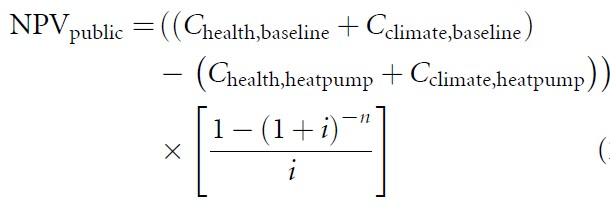

### PUBLIC NPV: WHOLE-HOME

In [12]:
print("""
-------------------------------------------------------------------------------------------------------
print("Public NPV: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
""")
df_euss_am_mp9_home = calculate_public_npv(df=df_euss_am_mp9_home,
                                           interest_rate=0.02,
                                           grid_decarb=False,
                                           menu_mp=menu_mp
                                           )
df_euss_am_mp9_home


-------------------------------------------------------------------------------------------------------
print("Public NPV: WHOLE-HOME
-------------------------------------------------------------------------------------------------------



,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp9_heating_public_npv,mp9_waterHeating_climate_npv,mp9_waterHeating_health_npv,mp9_waterHeating_public_npv,mp9_clothesDrying_climate_npv,mp9_clothesDrying_health_npv,mp9_clothesDrying_public_npv,mp9_cooking_climate_npv,mp9_cooking_health_npv,mp9_cooking_public_npv
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,12078.15,2345.65,339.99,2685.64,354.64,51.41,406.04,608.16,88.15,696.30
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,35899.81,1389.28,350.57,1739.86,0.00,0.00,0.00,0.00,0.00,0.00
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,43738.89,1907.58,276.48,2184.05,0.00,0.00,0.00,0.00,0.00,0.00
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,13498.29,1993.05,300.30,2293.34,267.59,40.40,307.99,518.72,78.12,596.85
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,9741.85,5873.93,343.37,6217.30,992.64,57.99,1050.63,827.11,48.44,875.55
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,20299.89,1955.67,131.74,2087.41,0.00,0.00,0.00,0.00,0.00,0.00


## Private Perspective: Annual Energy Costs

In [13]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Annual Energy Costs
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Obtain Level Energy Fuel Cost Data from the EIA
- Step 2: Calculate Annual Operating (Fuel) Costs
------------------------------------------------------------------------------------------------------------------------------------------------
""")


------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Annual Energy Costs
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Obtain Level Energy Fuel Cost Data from the EIA
- Step 2: Calculate Annual Operating (Fuel) Costs
------------------------------------------------------------------------------------------------------------------------------------------------



### Post-Retrofit (MP) Fuel Cost: WHOLE-HOME

In [14]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Fuel Cost: WHOLE-HOME
------------------------------------------------------------------------------------------------------------------------------------------------
""")

df_euss_am_mp9_home = calculate_annual_fuelCost(df=df_euss_am_mp9_home,
                                                fuel_price_lookup=iraRef_fuel_price_lookup,
                                                menu_mp=menu_mp,
                                                scenario='AEO2023 Reference Case'
                                                )
df_euss_am_mp9_home


------------------------------------------------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Fuel Cost: WHOLE-HOME
------------------------------------------------------------------------------------------------------------------------------------------------

Calculating POST-RETROFIT (MP9) fuel costs from 2022 to 2037 for heating
Calculating POST-RETROFIT (MP9) fuel costs from 2022 to 2034 for waterHeating
Calculating POST-RETROFIT (MP9) fuel costs from 2022 to 2035 for clothesDrying
Calculating POST-RETROFIT (MP9) fuel costs from 2022 to 2037 for cooking


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp9_2034_cooking_delta_fuelCost,mp9_2034_cooking_percentChange_fuelCost,mp9_2035_cooking_fuelCost,mp9_2035_cooking_savings_fuelCost,mp9_2035_cooking_delta_fuelCost,mp9_2035_cooking_percentChange_fuelCost,mp9_2036_cooking_fuelCost,mp9_2036_cooking_savings_fuelCost,mp9_2036_cooking_delta_fuelCost,mp9_2036_cooking_percentChange_fuelCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,42.24,112.46,80.33,-42.86,42.86,114.38,80.68,-43.37,43.37,116.24
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,-1.94,-3.28,57.50,2.05,-2.05,-3.44,57.76,1.74,-1.74,-2.92
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,-1.85,-3.28,54.92,1.96,-1.96,-3.45,55.17,1.67,-1.67,-2.94
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,-2.44,-3.26,72.78,2.60,-2.60,-3.45,73.11,2.21,-2.21,-2.93
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,-2.31,-3.28,68.67,2.45,-2.45,-3.44,68.97,2.09,-2.09,-2.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,36.16,112.82,68.67,-36.70,36.70,114.80,68.97,-37.14,37.14,116.68
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,-3.44,-3.28,102.11,3.64,-3.64,-3.44,102.56,3.10,-3.10,-2.93
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,57.34,112.23,109.15,-58.18,58.18,114.15,109.64,-58.89,58.89,116.04
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,-2.31,-3.28,68.67,2.45,-2.45,-3.44,68.97,2.09,-2.09,-2.94


## Private Perspective: Private NPV

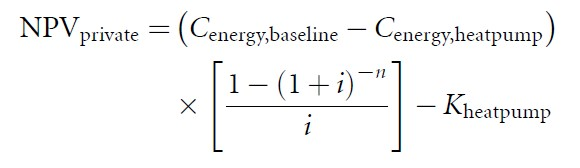

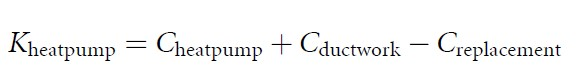

In [15]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Private NPV
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Calculate annual operating (fuel) costs
- Step 2: Calculate equipment capital costs (For space heating, include ductwork and weatherization (MP9 and MP9))
- Step 3: Calculate replacement cost (replacing existing piece of eqipment with similar technology)
- Step 4: Calculate net equipment capital costs
- Step 5: Calculate private NPV
------------------------------------------------------------------------------------------------------------------------------------------------
""")


------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Private NPV
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Calculate annual operating (fuel) costs
- Step 2: Calculate equipment capital costs (For space heating, include ductwork and weatherization (MP9 and MP9))
- Step 3: Calculate replacement cost (replacing existing piece of eqipment with similar technology)
- Step 4: Calculate net equipment capital costs
- Step 5: Calculate private NPV
------------------------------------------------------------------------------------------------------------------------------------------------



In [20]:
df_heating_retrofit_costs

,action_measure,technology,fuel,efficiency,data_year,ppidcs_ratio,cost_multiplier,unitCost_progressive,unitCost_reference,unitCost_conservative,cost_per_kBtuh_progressive,cost_per_kBtuh_reference,cost_per_kBtuh_conservative,otherCost_progressive,otherCost_reference,otherCost_conservative,lifetime,source,notes
0,Replace,Natural Gas Furnace,Natural Gas,95 AFUE,2013,1.633627,1.0,2500,2500,2500,3.9,3.9,3.9,0,0,0,20,NREL REMDB,Data Year 2013. Replacement Costs kept constan...
1,Replace,Electric Furnace,Electricity,100 AFUE,2013,1.633627,1.0,1600,1600,1600,50.0,50.0,50.0,0,0,0,20,NREL REMDB,Data Year 2013. Replacement Costs kept constan...
2,Replace,Fuel Oil Furnace,Fuel Oil,95 AFUE,2013,1.633627,1.0,4100,4100,4100,3.9,3.9,3.9,0,0,0,15,NREL REMDB,Data Year 2013. Replacement Costs kept constan...
3,Replace,Propane Furnace,Propane,94 AFUE,2013,1.633627,1.0,3800,3800,3800,3.9,3.9,3.9,0,0,0,20,NREL REMDB,Data Year 2013. Replacement Costs kept constan...
4,Install,Electric ASHP,Electricity,"SEER 18, 9.3 HSPF",2013,1.633627,1.0,3700,4800,5900,42.0,55.0,68.0,0,0,0,15,NREL REMDB,Data Year 2013
5,Install,Electric MSHP,Electricity,"SEER 18, 9.6 HSPF",2013,1.633627,1.0,1800,2300,2800,65.0,85.0,105.0,490,630,770,15,NREL REMDB,Data Year 2013
6,Install,Electric MSHP - Ducted,Electricity,"SEER 15.5, 10 HSPF",2013,1.633627,1.3,2340,2990,3640,90.0,117.0,144.0,1690,2210,2730,15,NREL REMDB,Data Year 2013. Only 10 HSPF available and EUS...
7,Install,Electric MSHP,Electricity,"SEER 29.3, 14 HSPF",2013,1.633627,1.0,1800,2300,2800,95.0,120.0,145.0,710,920,1130,15,NREL REMDB,Data Year 2013


In [21]:
# Collect Capital Cost Data for different End-uses
filename = "tare_retrofit_costs_cpi.xlsx"
relative_path = os.path.join(r"retrofit_costs", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

df_heating_retrofit_costs = pd.read_excel(io=file_path, sheet_name='heating_costs')
df_waterHeating_retrofit_costs = pd.read_excel(io=file_path, sheet_name='waterHeating_costs')
df_clothesDrying_retrofit_costs = pd.read_excel(io=file_path, sheet_name='clothesDrying_costs')
df_cooking_retrofit_costs = pd.read_excel(io=file_path, sheet_name='cooking_costs')
df_enclosure_retrofit_costs = pd.read_excel(io=file_path, sheet_name='enclosure_upgrade_costs')

Retrieved data for filename: tare_retrofit_costs_cpi.xlsx
Located at filepath: c:\Users\14128\Research\cmu-tare-model\retrofit_costs\tare_retrofit_costs_cpi.xlsx




In [22]:
# Assuming df_rsMeans_cityCostIndex is your DataFrame with average costs
# Accounts for the costs of materials, labor and equipment and compares it to a national average of 30 major U.S. cities
average_cost_map = df_rsMeans_cityCostIndex.set_index('City')['Average'].to_dict()
rsMeans_national_avg = round((3.00 * (cpi_ratio_2022_2019)), 2)

# Use CCI to adjust for cost differences when compared to the national average
# Call the function and map the values for CCI adjustment
df_euss_am_mp9_home['rsMeans_CCI_avg'] = df_euss_am_mp9_home['city'].apply(map_average_cost)
df_euss_am_mp9_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp9_2034_cooking_percentChange_fuelCost,mp9_2035_cooking_fuelCost,mp9_2035_cooking_savings_fuelCost,mp9_2035_cooking_delta_fuelCost,mp9_2035_cooking_percentChange_fuelCost,mp9_2036_cooking_fuelCost,mp9_2036_cooking_savings_fuelCost,mp9_2036_cooking_delta_fuelCost,mp9_2036_cooking_percentChange_fuelCost,rsMeans_CCI_avg
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,112.46,80.33,-42.86,42.86,114.38,80.68,-43.37,43.37,116.24,3.0
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,-3.28,57.50,2.05,-2.05,-3.44,57.76,1.74,-1.74,-2.92,3.0
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,-3.28,54.92,1.96,-1.96,-3.45,55.17,1.67,-1.67,-2.94,3.0
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,-3.26,72.78,2.60,-2.60,-3.45,73.11,2.21,-2.21,-2.93,3.0
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,-3.28,68.67,2.45,-2.45,-3.44,68.97,2.09,-2.09,-2.94,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,112.82,68.67,-36.70,36.70,114.80,68.97,-37.14,37.14,116.68,3.0
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,-3.28,102.11,3.64,-3.64,-3.44,102.56,3.10,-3.10,-2.93,3.0
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,112.23,109.15,-58.18,58.18,114.15,109.64,-58.89,58.89,116.04,3.0
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,-3.28,68.67,2.45,-2.45,-3.44,68.97,2.09,-2.09,-2.94,3.0


### Space Heating with Basic Enclosure Upgrade

#### Space Heating Capital Costs

In [23]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Space Heating
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
    'cost_per_kBtuh_progressive', 'cost_per_kBtuh_reference', 'cost_per_kBtuh_conservative',
    'otherCost_progressive', 'otherCost_reference', 'otherCost_conservative'
]

# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_heating_retrofit_costs[column] = round((df_heating_retrofit_costs[column] * df_heating_retrofit_costs['cpi_ratio'] * df_heating_retrofit_costs['cost_multiplier']), 2)

# # Display the updated DataFrame
# df_heating_retrofit_costs

# Creating a dictionary from the DataFrame
dict_heating_equipment_cost = df_heating_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_heating_equipment_cost


------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Space Heating
------------------------------------------------------------------------------------------------------------------------------------------------



In [24]:
# Call the function and obtain equipment specifications
# obtain_heating_system_specs(df)
df_euss_am_mp9_home = obtain_heating_system_specs(df_euss_am_mp9_home)

# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_installation_cost(df_euss_am_mp9_home, dict_heating_equipment_cost, rsMeans_national_avg, menu_mp, 'heating')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_replacement_cost(df_euss_am_mp9_home, dict_heating_equipment_cost, rsMeans_national_avg, menu_mp, 'heating')

# Call the function and calculate installation premium based on existing housing characteristics
# calculate_heating_installation_premium(df, rsMeans_national_avg, cpi_ratio_2022_2013)
df_euss_am_mp9_home = calculate_heating_installation_premium(df_euss_am_mp9_home, rsMeans_national_avg, cpi_ratio_2022_2013)

# Display the df
df_euss_am_mp9_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp9_2036_cooking_percentChange_fuelCost,rsMeans_CCI_avg,total_heating_load_kBtuh,baseline_AFUE,baseline_SEER,baseline_HSPF,ugrade_newInstall_HSPF,mp9_heating_installationCost,mp9_heating_replacementCost,mp9_heating_installation_premium
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,116.24,3.0,88.57,80.0,NaN,NaN,NaN,16904.50,3255.08,0.0
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,-2.92,3.0,89.04,92.5,NaN,NaN,NaN,20263.43,5087.58,0.0
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,-2.94,3.0,69.93,100.0,NaN,NaN,29.3,11751.27,5830.48,0.0
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,-2.93,3.0,82.58,80.0,NaN,NaN,NaN,18383.31,5058.77,0.0
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,-2.94,3.0,82.82,100.0,NaN,NaN,29.3,15831.67,6567.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,116.68,3.0,159.35,92.5,NaN,NaN,NaN,38463.41,3570.81,0.0
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,-2.93,3.0,75.51,100.0,NaN,NaN,NaN,24076.78,6149.66,0.0
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,116.04,3.0,44.92,92.5,NaN,NaN,NaN,16052.37,3060.38,0.0
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,-2.94,3.0,98.06,80.0,NaN,NaN,NaN,25172.17,3297.42,0.0


#### Weatherization (Basic Enclosure Upgrade) Capital Costs

In [25]:
# Weatherization Capital Costs
cost_columns = [
    'normalized_cost_progressive', 'normalized_cost_reference', 'normalized_cost_conservative',
]

# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_enclosure_retrofit_costs[column] = round((df_enclosure_retrofit_costs[column] * df_enclosure_retrofit_costs['cpi_ratio'] * df_enclosure_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_enclosure_retrofit_cost = df_enclosure_retrofit_costs.set_index(['technology', 'existing_characteristic']).to_dict(orient='index')
# dict_enclosure_retrofit_cost

In [26]:
# ATTIC FLOOR INSULATION
# calculate_enclosure_retrofit_upgradeCosts(df, cost_dict, retrofit_col, params_col, rsMeans_national_avg)
calculate_enclosure_retrofit_upgradeCosts(df=df_euss_am_mp9_home,
                                          cost_dict=dict_enclosure_retrofit_cost,
                                          retrofit_col='insulation_atticFloor_upgradeCost',
                                          params_col='out_params_floor_area_attic_ft_2',
                                          rsMeans_national_avg=rsMeans_national_avg
                                         )
# df_euss_am_mp9_home

Extracted Parameters: {'conditions': [0        False
1        False
2        False
3        False
4        False
         ...  
11604    False
11605    False
11606    False
11607    False
11608    False
Length: 11609, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
11604    False
11605    False
11606    False
11607    False
11608    False
Length: 11609, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
11604    False
11605    False
11606    False
11607    False
11608    False
Length: 11609, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
11604    False
11605    False
11606    False
11607    False
11608    False
Length: 11609, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
11604    False
11605    False
11606    False
11607    False
11608    False
Length: 11609, dtype: boo

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,rsMeans_CCI_avg,total_heating_load_kBtuh,baseline_AFUE,baseline_SEER,baseline_HSPF,ugrade_newInstall_HSPF,mp9_heating_installationCost,mp9_heating_replacementCost,mp9_heating_installation_premium,insulation_atticFloor_upgradeCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,3.0,88.57,80.0,NaN,NaN,NaN,16904.50,3255.08,0.0,4261.22
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,3.0,89.04,92.5,NaN,NaN,NaN,20263.43,5087.58,0.0,5530.08
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,3.0,69.93,100.0,NaN,NaN,29.3,11751.27,5830.48,0.0,3064.41
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,3.0,82.58,80.0,NaN,NaN,NaN,18383.31,5058.77,0.0,3332.06
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,3.0,82.82,100.0,NaN,NaN,29.3,15831.67,6567.80,0.0,1459.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,3.0,159.35,92.5,NaN,NaN,NaN,38463.41,3570.81,0.0,3326.66
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,3.0,75.51,100.0,NaN,NaN,NaN,24076.78,6149.66,0.0,4246.65
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,3.0,44.92,92.5,NaN,NaN,NaN,16052.37,3060.38,0.0,NaN
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,3.0,98.06,80.0,NaN,NaN,NaN,25172.17,3297.42,0.0,NaN


In [27]:
# INFILTRATION REDUCTION
# calculate_enclosure_retrofit_upgradeCosts(df, cost_dict, retrofit_col, params_col, rsMeans_national_avg)
calculate_enclosure_retrofit_upgradeCosts(df=df_euss_am_mp9_home,
                                          cost_dict=dict_enclosure_retrofit_cost,
                                          retrofit_col='infiltration_reduction_upgradeCost',
                                          params_col='square_footage',
                                          rsMeans_national_avg=rsMeans_national_avg
                                         )
# df_euss_am_mp9_home

Extracted Parameters: {'conditions': [0        False
1         True
2         True
3         True
4         True
         ...  
11604     True
11605     True
11606     True
11607    False
11608    False
Name: upgrade_infiltration_reduction, Length: 11609, dtype: bool], 'tech_eff_pairs': [('Air Leakage Reduction: 30% Reduction', 'Varies')]}
Mapped Tech: ['unknown' 'Air Leakage Reduction: 30% Reduction'
 'Air Leakage Reduction: 30% Reduction' ...
 'Air Leakage Reduction: 30% Reduction' 'unknown' 'unknown']
Mapped Efficiency: ['unknown' 'Varies' 'Varies' ... 'Varies' 'unknown' 'unknown']
Valid Indices: [False  True  True ...  True False False]
Valid Tech: ['Air Leakage Reduction: 30% Reduction'
 'Air Leakage Reduction: 30% Reduction'
 'Air Leakage Reduction: 30% Reduction' ...
 'Air Leakage Reduction: 30% Reduction'
 'Air Leakage Reduction: 30% Reduction'
 'Air Leakage Reduction: 30% Reduction']
Valid Efficiency: ['Varies' 'Varies' 'Varies' ... 'Varies' 'Varies' 'Varies']


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,total_heating_load_kBtuh,baseline_AFUE,baseline_SEER,baseline_HSPF,ugrade_newInstall_HSPF,mp9_heating_installationCost,mp9_heating_replacementCost,mp9_heating_installation_premium,insulation_atticFloor_upgradeCost,infiltration_reduction_upgradeCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,88.57,80.0,NaN,NaN,NaN,16904.50,3255.08,0.0,4261.22,NaN
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,89.04,92.5,NaN,NaN,NaN,20263.43,5087.58,0.0,5530.08,5664.85
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,69.93,100.0,NaN,NaN,29.3,11751.27,5830.48,0.0,3064.41,3864.45
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,82.58,80.0,NaN,NaN,NaN,18383.31,5058.77,0.0,3332.06,3251.43
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,82.82,100.0,NaN,NaN,29.3,15831.67,6567.80,0.0,1459.82,1994.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,159.35,92.5,NaN,NaN,NaN,38463.41,3570.81,0.0,3326.66,5677.78
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,75.51,100.0,NaN,NaN,NaN,24076.78,6149.66,0.0,4246.65,4604.98
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,44.92,92.5,NaN,NaN,NaN,16052.37,3060.38,0.0,NaN,1704.89
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,98.06,80.0,NaN,NaN,NaN,25172.17,3297.42,0.0,NaN,NaN


In [28]:
# DUCT SEALING
# calculate_enclosure_retrofit_upgradeCosts(df, cost_dict, retrofit_col, params_col, rsMeans_national_avg)
calculate_enclosure_retrofit_upgradeCosts(df=df_euss_am_mp9_home,
                                          cost_dict=dict_enclosure_retrofit_cost,
                                          retrofit_col='duct_sealing_upgradeCost',
                                          params_col='out_params_duct_unconditioned_surface_area_ft_2',
                                          rsMeans_national_avg=rsMeans_national_avg
                                         )
df_euss_am_mp9_home

Extracted Parameters: {'conditions': [0        False
1        False
2        False
3        False
4        False
         ...  
11604    False
11605    False
11606    False
11607    False
11608    False
Length: 11609, dtype: bool, 0        False
1         True
2        False
3         True
4        False
         ...  
11604     True
11605     True
11606    False
11607    False
11608    False
Length: 11609, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
11604    False
11605    False
11606    False
11607    False
11608    False
Length: 11609, dtype: bool], 'tech_eff_pairs': [('Duct Sealing: 10% Leakage, R-8', '10% Leakage'), ('Duct Sealing: 10% Leakage, R-8', '20% Leakage'), ('Duct Sealing: 10% Leakage, R-8', '30% Leakage')]}
Mapped Tech: ['unknown' 'Duct Sealing: 10% Leakage, R-8' 'unknown' ... 'unknown'
 'unknown' 'unknown']
Mapped Efficiency: ['unknown' '20% Leakage' 'unknown' ... 'unknown' 'unknown' 'unknown']
Valid Indices: [F

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,baseline_AFUE,baseline_SEER,baseline_HSPF,ugrade_newInstall_HSPF,mp9_heating_installationCost,mp9_heating_replacementCost,mp9_heating_installation_premium,insulation_atticFloor_upgradeCost,infiltration_reduction_upgradeCost,duct_sealing_upgradeCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,80.0,NaN,NaN,NaN,16904.50,3255.08,0.0,4261.22,NaN,NaN
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,92.5,NaN,NaN,NaN,20263.43,5087.58,0.0,5530.08,5664.85,2266.42
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,100.0,NaN,NaN,29.3,11751.27,5830.48,0.0,3064.41,3864.45,NaN
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,80.0,NaN,NaN,NaN,18383.31,5058.77,0.0,3332.06,3251.43,2876.09
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,100.0,NaN,NaN,29.3,15831.67,6567.80,0.0,1459.82,1994.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,92.5,NaN,NaN,NaN,38463.41,3570.81,0.0,3326.66,5677.78,3129.12
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,100.0,NaN,NaN,NaN,24076.78,6149.66,0.0,4246.65,4604.98,2062.70
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,92.5,NaN,NaN,NaN,16052.37,3060.38,0.0,NaN,1704.89,NaN
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,80.0,NaN,NaN,NaN,25172.17,3297.42,0.0,NaN,NaN,NaN


In [29]:
# DRILL AND FILL WALL INSULATION
# calculate_enclosure_retrofit_upgradeCosts(df, cost_dict, retrofit_col, params_col, rsMeans_national_avg)
calculate_enclosure_retrofit_upgradeCosts(df=df_euss_am_mp9_home,
                                          cost_dict=dict_enclosure_retrofit_cost,
                                          retrofit_col='insulation_wall_upgradeCost',
                                          params_col='out_params_wall_area_above_grade_exterior_ft_2',
                                          rsMeans_national_avg=rsMeans_national_avg
                                         )
df_euss_am_mp9_home

Extracted Parameters: {'conditions': [0        False
1         True
2         True
3         True
4        False
         ...  
11604     True
11605    False
11606     True
11607    False
11608     True
Name: upgrade_insulation_wall, Length: 11609, dtype: bool], 'tech_eff_pairs': [('Drill-and-fill Wall Insulation: Wood Stud, R-13', 'Wood Stud, Uninsulated')]}
Mapped Tech: ['unknown' 'Drill-and-fill Wall Insulation: Wood Stud, R-13'
 'Drill-and-fill Wall Insulation: Wood Stud, R-13' ...
 'Drill-and-fill Wall Insulation: Wood Stud, R-13' 'unknown'
 'Drill-and-fill Wall Insulation: Wood Stud, R-13']
Mapped Efficiency: ['unknown' 'Wood Stud, Uninsulated' 'Wood Stud, Uninsulated' ...
 'Wood Stud, Uninsulated' 'unknown' 'Wood Stud, Uninsulated']
Valid Indices: [False  True  True ...  True False  True]
Valid Tech: ['Drill-and-fill Wall Insulation: Wood Stud, R-13'
 'Drill-and-fill Wall Insulation: Wood Stud, R-13'
 'Drill-and-fill Wall Insulation: Wood Stud, R-13' ...
 'Drill-and-fill Wall In

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,baseline_SEER,baseline_HSPF,ugrade_newInstall_HSPF,mp9_heating_installationCost,mp9_heating_replacementCost,mp9_heating_installation_premium,insulation_atticFloor_upgradeCost,infiltration_reduction_upgradeCost,duct_sealing_upgradeCost,insulation_wall_upgradeCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,NaN,NaN,NaN,16904.50,3255.08,0.0,4261.22,NaN,NaN,NaN
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,NaN,NaN,NaN,20263.43,5087.58,0.0,5530.08,5664.85,2266.42,4525.89
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,NaN,NaN,29.3,11751.27,5830.48,0.0,3064.41,3864.45,NaN,7341.72
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,NaN,NaN,NaN,18383.31,5058.77,0.0,3332.06,3251.43,2876.09,8236.71
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,NaN,NaN,29.3,15831.67,6567.80,0.0,1459.82,1994.89,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,NaN,NaN,NaN,38463.41,3570.81,0.0,3326.66,5677.78,3129.12,7092.50
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,NaN,NaN,NaN,24076.78,6149.66,0.0,4246.65,4604.98,2062.70,NaN
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,NaN,NaN,NaN,16052.37,3060.38,0.0,NaN,1704.89,NaN,3240.02
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,NaN,NaN,NaN,25172.17,3297.42,0.0,NaN,NaN,NaN,NaN


#### Private NPV for Space Heating and Weatherization (Basic Enclosure Upgrade)

In [30]:
print("Calculating the cost of total basic enclosure upgrade ...")

# Replace NaN values with 0.0
# Calculate the total upgrade cost
df_euss_am_mp9_home['mp9_enclosure_upgradeCost'] = round(
    df_euss_am_mp9_home['insulation_atticFloor_upgradeCost'].fillna(0.0) +
    df_euss_am_mp9_home['infiltration_reduction_upgradeCost'].fillna(0.0) +
    df_euss_am_mp9_home['duct_sealing_upgradeCost'].fillna(0.0) +
    df_euss_am_mp9_home['insulation_wall_upgradeCost'].fillna(0.0), 2
)

df_euss_am_mp9_home

Calculating the cost of total basic enclosure upgrade ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,baseline_HSPF,ugrade_newInstall_HSPF,mp9_heating_installationCost,mp9_heating_replacementCost,mp9_heating_installation_premium,insulation_atticFloor_upgradeCost,infiltration_reduction_upgradeCost,duct_sealing_upgradeCost,insulation_wall_upgradeCost,mp9_enclosure_upgradeCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,NaN,NaN,16904.50,3255.08,0.0,4261.22,NaN,NaN,NaN,4261.22
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,NaN,NaN,20263.43,5087.58,0.0,5530.08,5664.85,2266.42,4525.89,17987.24
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,NaN,29.3,11751.27,5830.48,0.0,3064.41,3864.45,NaN,7341.72,14270.58
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,NaN,NaN,18383.31,5058.77,0.0,3332.06,3251.43,2876.09,8236.71,17696.29
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,NaN,29.3,15831.67,6567.80,0.0,1459.82,1994.89,NaN,NaN,3454.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,NaN,NaN,38463.41,3570.81,0.0,3326.66,5677.78,3129.12,7092.50,19226.06
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,NaN,NaN,24076.78,6149.66,0.0,4246.65,4604.98,2062.70,NaN,10914.33
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,NaN,NaN,16052.37,3060.38,0.0,NaN,1704.89,NaN,3240.02,4944.91
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,NaN,NaN,25172.17,3297.42,0.0,NaN,NaN,NaN,NaN,0.00


### Water Heating

In [31]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Water Heating
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
    'cost_per_gallon_progressive', 'cost_per_gallon_reference', 'cost_per_gallon_conservative',
]

# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_waterHeating_retrofit_costs[column] = round((df_waterHeating_retrofit_costs[column] * df_waterHeating_retrofit_costs['cpi_ratio'] * df_waterHeating_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_waterHeating_equipment_cost = df_waterHeating_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_waterHeating_equipment_cost


------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Water Heating
------------------------------------------------------------------------------------------------------------------------------------------------



In [32]:
# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_installation_cost(df_euss_am_mp9_home, dict_waterHeating_equipment_cost, rsMeans_national_avg, menu_mp, 'waterHeating')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_replacement_cost(df_euss_am_mp9_home, dict_waterHeating_equipment_cost, rsMeans_national_avg, menu_mp, 'waterHeating')

# Display the df
df_euss_am_mp9_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp9_heating_installationCost,mp9_heating_replacementCost,mp9_heating_installation_premium,insulation_atticFloor_upgradeCost,infiltration_reduction_upgradeCost,duct_sealing_upgradeCost,insulation_wall_upgradeCost,mp9_enclosure_upgradeCost,mp9_waterHeating_installationCost,mp9_waterHeating_replacementCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,16904.50,3255.08,0.0,4261.22,NaN,NaN,NaN,4261.22,2227.15,1654.36
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,20263.43,5087.58,0.0,5530.08,5664.85,2266.42,4525.89,17987.24,2401.17,2503.59
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,11751.27,5830.48,0.0,3064.41,3864.45,NaN,7341.72,14270.58,3676.98,939.35
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,18383.31,5058.77,0.0,3332.06,3251.43,2876.09,8236.71,17696.29,3591.13,1830.56
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,15831.67,6567.80,0.0,1459.82,1994.89,NaN,NaN,3454.71,1888.21,939.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,38463.41,3570.81,0.0,3326.66,5677.78,3129.12,7092.50,19226.06,3911.10,1830.56
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,24076.78,6149.66,0.0,4246.65,4604.98,2062.70,NaN,10914.33,2484.13,995.43
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,16052.37,3060.38,0.0,NaN,1704.89,NaN,3240.02,4944.91,2703.28,1654.36
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,25172.17,3297.42,0.0,NaN,NaN,NaN,NaN,0.00,2253.60,1452.98


### Clothes Drying

In [33]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Clothes Drying
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
]
 
# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_clothesDrying_retrofit_costs[column] = round((df_clothesDrying_retrofit_costs[column] * df_clothesDrying_retrofit_costs['cpi_ratio'] * df_clothesDrying_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_clothesDrying_equipment_cost = df_clothesDrying_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_clothesDrying_equipment_cost


------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Clothes Drying
------------------------------------------------------------------------------------------------------------------------------------------------



In [34]:
# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_installation_cost(df_euss_am_mp9_home, dict_clothesDrying_equipment_cost, rsMeans_national_avg, menu_mp, 'clothesDrying')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_replacement_cost(df_euss_am_mp9_home, dict_clothesDrying_equipment_cost, rsMeans_national_avg, menu_mp, 'clothesDrying')

# Display the df
df_euss_am_mp9_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp9_heating_installation_premium,insulation_atticFloor_upgradeCost,infiltration_reduction_upgradeCost,duct_sealing_upgradeCost,insulation_wall_upgradeCost,mp9_enclosure_upgradeCost,mp9_waterHeating_installationCost,mp9_waterHeating_replacementCost,mp9_clothesDrying_installationCost,mp9_clothesDrying_replacementCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,0.0,4261.22,NaN,NaN,NaN,4261.22,2227.15,1654.36,2364.45,1144.01
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,0.0,5530.08,5664.85,2266.42,4525.89,17987.24,2401.17,2503.59,1527.30,869.44
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,0.0,3064.41,3864.45,NaN,7341.72,14270.58,3676.98,939.35,1745.70,869.44
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,0.0,3332.06,3251.43,2876.09,8236.71,17696.29,3591.13,1830.56,1944.83,869.44
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,0.0,1459.82,1994.89,NaN,NaN,3454.71,1888.21,939.35,1925.77,869.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,0.0,3326.66,5677.78,3129.12,7092.50,19226.06,3911.10,1830.56,2198.26,1144.01
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,0.0,4246.65,4604.98,2062.70,NaN,10914.33,2484.13,995.43,1652.06,869.44
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,0.0,NaN,1704.89,NaN,3240.02,4944.91,2703.28,1654.36,2520.50,1144.01
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,0.0,NaN,NaN,NaN,NaN,0.00,2253.60,1452.98,1659.20,869.44


### Cooking

In [35]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Cooking
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
]
 
# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_cooking_retrofit_costs[column] = round((df_cooking_retrofit_costs[column] * df_cooking_retrofit_costs['cpi_ratio'] * df_cooking_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_cooking_equipment_cost = df_cooking_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_cooking_equipment_cost


------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Cooking
------------------------------------------------------------------------------------------------------------------------------------------------



In [36]:
# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_installation_cost(df_euss_am_mp9_home, dict_cooking_equipment_cost, rsMeans_national_avg, menu_mp, 'cooking')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_replacement_cost(df_euss_am_mp9_home, dict_cooking_equipment_cost, rsMeans_national_avg, menu_mp, 'cooking')

# Display the df
df_euss_am_mp9_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,infiltration_reduction_upgradeCost,duct_sealing_upgradeCost,insulation_wall_upgradeCost,mp9_enclosure_upgradeCost,mp9_waterHeating_installationCost,mp9_waterHeating_replacementCost,mp9_clothesDrying_installationCost,mp9_clothesDrying_replacementCost,mp9_cooking_installationCost,mp9_cooking_replacementCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,NaN,NaN,NaN,4261.22,2227.15,1654.36,2364.45,1144.01,1653.74,938.08
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,5664.85,2266.42,4525.89,17987.24,2401.17,2503.59,1527.30,869.44,1700.04,1052.48
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,3864.45,NaN,7341.72,14270.58,3676.98,939.35,1745.70,869.44,2097.82,1052.48
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,3251.43,2876.09,8236.71,17696.29,3591.13,1830.56,1944.83,869.44,1990.50,1052.48
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,1994.89,NaN,NaN,3454.71,1888.21,939.35,1925.77,869.44,1427.57,1052.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,5677.78,3129.12,7092.50,19226.06,3911.10,1830.56,2198.26,1144.01,2138.31,938.08
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,4604.98,2062.70,NaN,10914.33,2484.13,995.43,1652.06,869.44,1376.65,1052.48
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,1704.89,NaN,3240.02,4944.91,2703.28,1654.36,2520.50,1144.01,1523.36,938.08
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,NaN,NaN,NaN,0.00,2253.60,1452.98,1659.20,869.44,1013.46,1052.48


## Private NPV Calculation for Whole Home

In [37]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Calculate Private NPV for WHOLE-HOME
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Assume 15 year lifetime and 7% discount rate
# calculate_private_NPV(df, interest_rate, ira_rebates=False)
df_euss_am_mp9_home = calculate_private_NPV(df=df_euss_am_mp9_home,
                                            interest_rate=0.07,
                                            menu_mp=menu_mp,
                                            input_mp=input_mp,
                                            ira_rebates=False,
                                           )
df_euss_am_mp9_home


------------------------------------------------------------------------------------------------------------------------------------------------
Calculate Private NPV for WHOLE-HOME
------------------------------------------------------------------------------------------------------------------------------------------------



,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp9_waterHeating_private_npv_total,mp9_waterHeating_private_npv,mp9_clothesDrying_total_capitalCost,mp9_clothesDrying_net_capitalCost,mp9_clothesDrying_private_npv_total,mp9_clothesDrying_private_npv,mp9_cooking_total_capitalCost,mp9_cooking_net_capitalCost,mp9_cooking_private_npv_total,mp9_cooking_private_npv
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,3998.41,5652.77,2364.45,1220.44,-4237.65,-3093.64,1653.74,715.66,-6806.72,-5868.64
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,13460.30,15963.89,1527.30,657.86,854.38,1723.82,1700.04,647.56,-1570.89,-518.41
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,9572.77,10512.12,1745.70,876.26,1020.26,1889.70,2097.82,1045.34,-1974.23,-921.75
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,1447.00,3277.56,1944.83,1075.39,6612.15,7481.59,1990.50,938.02,-1826.83,-774.35
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,24111.70,25051.05,1925.77,1056.33,1530.45,2399.89,1427.57,375.09,-1273.28,-220.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,948.39,2778.95,2198.26,1054.25,-3611.71,-2467.70,2138.31,1200.23,-6551.73,-5613.65
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,49488.76,50484.19,1652.06,782.62,5028.96,5898.40,1376.65,324.17,-1147.13,-94.65
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,11374.81,13029.17,2520.50,1376.49,-7761.00,-6616.99,1523.36,585.28,-8517.96,-7579.88
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,3337.73,4790.71,1659.20,789.76,1797.02,2666.46,1013.46,-39.02,-859.17,193.31


## Determine Adoption Decision for WHOLE-HOME

In [38]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption without IRA Rebates
------------------------------------------------------------------------------------------------------------------------------------------------
""")

print("Determining Adoption Decision for each end-use ...")
# adoption_decision(df, category, upgrade_column, ira_rebates=False, grid_decarb=False)
df_euss_am_mp9_home = adoption_decision(df=df_euss_am_mp9_home,
                                        ira_rebates=False, 
                                        grid_decarb=False
                                       )
df_euss_am_mp9_home


------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption without IRA Rebates
------------------------------------------------------------------------------------------------------------------------------------------------

Determining Adoption Decision for each end-use ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp9_heating_retrofit_publicImpact,mp9_waterHeating_net_npv,mp9_waterHeating_adoption,mp9_waterHeating_retrofit_publicImpact,mp9_clothesDrying_net_npv,mp9_clothesDrying_adoption,mp9_clothesDrying_retrofit_publicImpact,mp9_cooking_net_npv,mp9_cooking_adoption,mp9_cooking_retrofit_publicImpact
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,8338.41,Adoption,Public Benefit,-2687.60,Averse to Adoption,Public Benefit,-5172.34,Averse to Adoption,Public Benefit
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,Public Benefit,17703.75,Adoption,Public Benefit,1723.82,Adoption,No Retrofit,-518.41,Existing Equipment,No Retrofit
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,No Retrofit,10512.12,Adoption,No Retrofit,1889.70,Adoption,No Retrofit,-921.75,Existing Equipment,No Retrofit
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,5461.61,Adoption,Public Benefit,7481.59,Adoption,No Retrofit,-774.35,Existing Equipment,No Retrofit
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,No Retrofit,25051.05,Adoption,No Retrofit,2399.89,Adoption,No Retrofit,-220.80,Existing Equipment,No Retrofit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,Public Benefit,5072.29,Adoption,Public Benefit,-2159.71,Averse to Adoption,Public Benefit,-5016.80,Averse to Adoption,Public Benefit
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,No Retrofit,50484.19,Adoption,No Retrofit,5898.40,Adoption,No Retrofit,-94.65,Existing Equipment,No Retrofit
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,Public Benefit,19246.47,Adoption,Public Benefit,-5566.36,Averse to Adoption,Public Benefit,-6704.33,Averse to Adoption,Public Benefit
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,Public Benefit,6878.12,Adoption,Public Benefit,2666.46,Adoption,No Retrofit,193.31,Existing Equipment,No Retrofit


In [39]:
# # check_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp9_home,
#                            category = 'heating',
#                            upgrade_column = 'upgrade_hvac_heating_efficiency'
#                           )

In [40]:
# # check_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp9_home,
#                                category = 'waterHeating',
#                                upgrade_column = 'upgrade_water_heater_efficiency'
#                               )

In [41]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp9_home,
#                   category = 'clothesDrying',
#                   upgrade_column = 'upgrade_clothes_dryer'
#                  )

In [42]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp9_home,
#                   category = 'cooking',
#                   upgrade_column = 'upgrade_cooking_range'
#                  )

# Electrification: Moderate Retrofit

## WHOLE-HOME Retrofit Adoption Rate with IRA Rebates
### Scenario Moderate-IRA: Moderate Retrofit (MP9), IRA Rebates, Current Grid

In [43]:
# Measure Package 9
scenario_name = 'Moderate-IRA'
cost_scenario = 'IRA Rebates'
grid_scenario = 'Current Electricity Grid'

print(f"""
-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario {scenario_name}:
Moderate Retrofit: Measure Package {menu_mp}
{cost_scenario}
{grid_scenario}
-------------------------------------------------------------------------------------------------------
""")


-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario Moderate-IRA:
Moderate Retrofit: Measure Package 9
IRA Rebates
Current Electricity Grid
-------------------------------------------------------------------------------------------------------



In [44]:
# # Collect Area Median Income Data at PUMA-resolution
# filename = "nhgis0002_ds239_20185_puma.csv"
# relative_path = os.path.join(r"equity_data", filename)
# file_path = os.path.join(project_root, relative_path)

# print(f"Retrieved data for filename: {filename}")
# print(f"Located at filepath: {file_path}")
# print("\n")

# df_county_medianIncome = pd.read_csv(file_path, encoding='ISO-8859-1')
# df_county_medianIncome = df_county_medianIncome.drop(0)
# df_county_medianIncome = df_county_medianIncome.reset_index(drop=True)

# cols_interest = ['GISJOIN', 'STUSAB', 'STATE', 'PUMAA', 'GEOID', 'NAME_E', 'AJZAE001', 'AJZAM001']
# df_county_medianIncome = df_county_medianIncome[cols_interest]
# df_county_medianIncome = df_county_medianIncome.rename(columns={"GISJOIN": "gis_joinID_puma", "STUSAB": "state_abbrev", "STATE": "state", "PUMAA": "puma_code", "GEOID": "census_geoID", "NAME_E": "name_estimate", "AJZAE001": "median_income_USD2018", "AJZAM001": "median_income_USD2018_marginOfError"})
# df_county_medianIncome

### WHOLE-HOME Retrofit Adoption with IRA Rebates

In [45]:
print("""
-------------------------------------------------------------------------------------------------------
Home Retrofit Adoption with IRA Rebates
-------------------------------------------------------------------------------------------------------
""")

# Determine Percent AMI and Rebate Amounts
# Create a copy of the results df and define it as results_IRA
# This needs to be done before running the calculate_percent_AMI function
df_euss_am_mp9_home = df_euss_am_mp9_home.copy()

# calculate_percent_AMI(df_results_IRA, df_county_medianIncome):
df_euss_am_mp9_home = calculate_percent_AMI(df_euss_am_mp9_home, df_county_medianIncome)

print("Calculating rebate amounts for Space Heating ...")
calculate_rebateIRA(df_euss_am_mp9_home, "heating", menu_mp)

print("Calculating rebate amounts for Water Heating ...")
calculate_rebateIRA(df_euss_am_mp9_home, "waterHeating", menu_mp)

print("Calculating rebate amounts for Clothes Drying ...")
calculate_rebateIRA(df_euss_am_mp9_home, "clothesDrying", menu_mp)

print("Calculating rebate amounts for Cooking ...")
calculate_rebateIRA(df_euss_am_mp9_home, "cooking", menu_mp)


-------------------------------------------------------------------------------------------------------
Home Retrofit Adoption with IRA Rebates
-------------------------------------------------------------------------------------------------------

Calculating rebate amounts for Space Heating ...
Calculating rebate amounts for Water Heating ...
Calculating rebate amounts for Clothes Drying ...
Calculating rebate amounts for Cooking ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp9_cooking_adoption,mp9_cooking_retrofit_publicImpact,census_county_medianIncome,percent_AMI,lowModerateIncome_designation,mp9_heating_rebate_amount,weatherization_rebate_amount,mp9_waterHeating_rebate_amount,mp9_clothesDrying_rebate_amount,mp9_cooking_rebate_amount
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Averse to Adoption,Public Benefit,NaN,NaN,Middle-to-Upper-Income,0.00,0.0,0.00,0.00,0.00
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,Existing Equipment,No Retrofit,NaN,NaN,Middle-to-Upper-Income,0.00,0.0,0.00,0.00,0.00
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,Existing Equipment,No Retrofit,60808.0,85.70,Moderate-Income,5875.64,1600.0,1750.00,840.00,0.00
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Existing Equipment,No Retrofit,NaN,NaN,Middle-to-Upper-Income,0.00,0.0,0.00,0.00,0.00
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,Existing Equipment,No Retrofit,66602.0,170.68,Middle-to-Upper-Income,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,Averse to Adoption,Public Benefit,NaN,NaN,Middle-to-Upper-Income,0.00,0.0,0.00,0.00,0.00
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,Existing Equipment,No Retrofit,71310.0,129.48,Moderate-Income,8000.00,1600.0,1242.07,826.03,0.00
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,Averse to Adoption,Public Benefit,54522.0,146.73,Moderate-Income,8000.00,1600.0,1351.64,840.00,761.68
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,Existing Equipment,No Retrofit,NaN,NaN,Middle-to-Upper-Income,0.00,0.0,0.00,0.00,0.00


In [46]:
print("Calculating Private NPV for each end-use ...")
# Assume 15 year lifetime and 7% discount rate
# calculate_private_NPV(df, interest_rate, ira_rebates=False)
df_euss_am_mp9_home = calculate_private_NPV(df=df_euss_am_mp9_home,
                                            interest_rate=0.07,
                                            menu_mp=menu_mp,
                                            input_mp=input_mp,
                                            ira_rebates=True
                                           )
df_euss_am_mp9_home

Calculating Private NPV for each end-use ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,ira_mp9_waterHeating_private_npv_total,ira_mp9_waterHeating_private_npv,ira_mp9_clothesDrying_total_capitalCost,ira_mp9_clothesDrying_net_capitalCost,ira_mp9_clothesDrying_private_npv_total,ira_mp9_clothesDrying_private_npv,ira_mp9_cooking_total_capitalCost,ira_mp9_cooking_net_capitalCost,ira_mp9_cooking_private_npv_total,ira_mp9_cooking_private_npv
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,3998.41,5652.77,2364.45,1220.44,-4237.65,-3093.64,1653.74,715.66,-6806.72,-5868.64
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,13460.30,15963.89,1527.30,657.86,854.38,1723.82,1700.04,647.56,-1570.89,-518.41
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,11322.77,12262.12,905.70,36.26,1860.26,2729.70,2097.82,1045.34,-1974.23,-921.75
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,1447.00,3277.56,1944.83,1075.39,6612.15,7481.59,1990.50,938.02,-1826.83,-774.35
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,24111.70,25051.05,1925.77,1056.33,1530.45,2399.89,1427.57,375.09,-1273.28,-220.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,948.39,2778.95,2198.26,1054.25,-3611.71,-2467.70,2138.31,1200.23,-6551.73,-5613.65
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,50730.83,51726.26,826.03,-43.41,5854.99,6724.43,1376.65,324.17,-1147.13,-94.65
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,12726.45,14380.81,1680.50,536.49,-6921.00,-5776.99,761.68,-176.40,-7756.28,-6818.20
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,3337.73,4790.71,1659.20,789.76,1797.02,2666.46,1013.46,-39.02,-859.17,193.31


In [47]:
print("Determining Adoption Decision for each end-use ...")
# adoption_decision(df, category, upgrade_column, ira_rebates=False, grid_decarb=False)
df_euss_am_mp9_home = adoption_decision(df=df_euss_am_mp9_home,
                                        ira_rebates=True, 
                                        grid_decarb=False
                                       )
df_euss_am_mp9_home

Determining Adoption Decision for each end-use ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp9_heating_retrofit_publicImpact,ira_mp9_waterHeating_net_npv,ira_mp9_waterHeating_adoption,mp9_waterHeating_retrofit_publicImpact,ira_mp9_clothesDrying_net_npv,ira_mp9_clothesDrying_adoption,mp9_clothesDrying_retrofit_publicImpact,ira_mp9_cooking_net_npv,ira_mp9_cooking_adoption,mp9_cooking_retrofit_publicImpact
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,8338.41,Adoption,Public Benefit,-2687.60,Averse to Adoption,Public Benefit,-5172.34,Averse to Adoption,Public Benefit
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,Public Benefit,17703.75,Adoption,Public Benefit,1723.82,Adoption,No Retrofit,-518.41,Existing Equipment,No Retrofit
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,No Retrofit,12262.12,Adoption,No Retrofit,2729.70,Adoption,No Retrofit,-921.75,Existing Equipment,No Retrofit
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,5461.61,Adoption,Public Benefit,7481.59,Adoption,No Retrofit,-774.35,Existing Equipment,No Retrofit
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,No Retrofit,25051.05,Adoption,No Retrofit,2399.89,Adoption,No Retrofit,-220.80,Existing Equipment,No Retrofit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,Public Benefit,5072.29,Adoption,Public Benefit,-2159.71,Averse to Adoption,Public Benefit,-5016.80,Averse to Adoption,Public Benefit
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,No Retrofit,51726.26,Adoption,No Retrofit,6724.43,Adoption,No Retrofit,-94.65,Existing Equipment,No Retrofit
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,Public Benefit,20598.11,Adoption,Public Benefit,-4726.36,Averse to Adoption,Public Benefit,-5942.65,Averse to Adoption,Public Benefit
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,Public Benefit,6878.12,Adoption,Public Benefit,2666.46,Adoption,No Retrofit,193.31,Existing Equipment,No Retrofit


In [48]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp9_home,
#                   category = 'heating',
#                   upgrade_column = 'upgrade_hvac_heating_efficiency'
#                  )

In [49]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp9_home,
#                                category = 'waterHeating',
#                                upgrade_column = 'upgrade_water_heater_efficiency'
#                               )

In [50]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp9_home,
#                   category = 'clothesDrying',
#                   upgrade_column = 'upgrade_clothes_dryer'
#                  )

In [51]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp9_home,
#                   category = 'cooking',
#                   upgrade_column = 'upgrade_cooking_range'
#                  )

# Electricity Grid Decarbonization Scenarios

"Since the lifetime of a heat pump is 15 years [31, 32], we assume that emissions will diminish in all US electric grids during the life of the heat pump. To capture this effect, we use electric grid emissions projections from EPRI's National Electrification Assessment [16]. We use that study's 'Progressive' scenario (a balance between the study's 'Conservative' and 'Transformative' scenarios) to assume that from 2017 to 2032, (a) coal energy will decline by 75% from 1200 TWh to 300 TWh and (b) CO2 emissions intensity will decline by 45% from 850 lbs MWh−1 to 450 lbs MWh−1. We assume that the majority of health damages from coal energy [33]. Thus, we assume for each grid region that health damages will decline by 75% and CO2 emissions by 45% by 2032. We assume a linear trend."

15 year period from 2017 to 2032. Then levels off after 2032. 
- 75% health damage reduction / 15 years = 5%/year
- 45% CO2 emissions reduction / 15 years = 3%/year

In [52]:
# Measure Package 9
scenario_name = 'Moderate-IRA-Decarb'
cost_scenario = 'IRA Rebates'
grid_scenario = 'Gradually Decarbonizing Grid'

print(f"""
-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario {scenario_name}:
Moderate Retrofit: Measure Package {menu_mp}
{cost_scenario}
{grid_scenario}
-------------------------------------------------------------------------------------------------------
""")


-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario Moderate-IRA-Decarb:
Moderate Retrofit: Measure Package 9
IRA Rebates
Gradually Decarbonizing Grid
-------------------------------------------------------------------------------------------------------



In [53]:
# pd.set_option("display.max_columns", None)
# # pd.reset_option('display.max_columns')
# # pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

# Electrification: Moderate Retrofit
## Scenario Moderate-IRA-Decarb: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
**Steps**:
- Private Perspective Impacts do not change with the Decarbonizing Grid
- Public Perspective Impacts do change:
    - Emissions and damages from pollutants changes with a gradually decarbonizing grid
    - Updated Public NPV (gridDecarb) value and function
    - Update Net NPV (ira_gridDecarb)
    - Updated Adoption Rate (ira_gridDecarb)

## IRA, Grid Decarb: Public NPV and Adoption Rate

In [54]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption with IRA Rebates and Decarbonizing Grid
------------------------------------------------------------------------------------------------------------------------------------------------
""")


------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption with IRA Rebates and Decarbonizing Grid
------------------------------------------------------------------------------------------------------------------------------------------------



In [56]:
print("Calculating Marginal Damages for each end-use ...")
# calculate_marginal_damages(df, grid_decarb, scenario, emis_fossilFuel_lookup, damages_electricity_lookup)
df_euss_am_mp9_home = calculate_marginal_damages(df=df_euss_am_mp9_home,
                                                 scenario='AEO2023 Reference Case',
                                                 emis_fossilFuel_lookup=emis_fossilFuel_lookup,
                                                 damages_electricity_lookup=iraRef_damages_electricity_lookup,
                                                 grid_decarb=True,
                                                 )
df_euss_am_mp9_home

Calculating Marginal Damages for each end-use ...
End-use category: heating
End-use category: waterHeating
End-use category: clothesDrying
End-use category: cooking


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,gridDecarb_mp9_2036_cooking_reduction_damages_climate,gridDecarb_mp9_2036_cooking_reduction_damages_health,gridDecarb_mp9_2036_heating_damages_climate,gridDecarb_mp9_2036_heating_damages_co2,gridDecarb_mp9_2036_heating_damages_health,gridDecarb_mp9_2036_heating_damages_nox,gridDecarb_mp9_2036_heating_damages_pm25,gridDecarb_mp9_2036_heating_damages_so2,gridDecarb_mp9_2036_heating_reduction_damages_climate,gridDecarb_mp9_2036_heating_reduction_damages_health
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
print("Calculating Public NPV for each end-use ...")
df_euss_am_mp9_home = calculate_public_npv(df=df_euss_am_mp9_home,
                                           interest_rate=0.02,
                                           grid_decarb=True,
                                           menu_mp=menu_mp
                                          )
df_euss_am_mp9_home

Calculating Public NPV for each end-use ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,gridDecarb_mp9_heating_public_npv,gridDecarb_mp9_waterHeating_climate_npv,gridDecarb_mp9_waterHeating_health_npv,gridDecarb_mp9_waterHeating_public_npv,gridDecarb_mp9_clothesDrying_climate_npv,gridDecarb_mp9_clothesDrying_health_npv,gridDecarb_mp9_clothesDrying_public_npv,gridDecarb_mp9_cooking_climate_npv,gridDecarb_mp9_cooking_health_npv,gridDecarb_mp9_cooking_public_npv
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,12078.15,2345.65,339.99,2685.64,354.64,51.41,406.04,608.16,88.15,696.30
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,35899.81,1389.28,350.57,1739.86,0.00,0.00,0.00,0.00,0.00,0.00
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,43738.89,1907.58,276.48,2184.05,0.00,0.00,0.00,0.00,0.00,0.00
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,13498.29,1993.05,300.30,2293.34,267.59,40.40,307.99,518.72,78.12,596.85
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,9741.85,5873.93,343.37,6217.30,992.64,57.99,1050.63,827.11,48.44,875.55
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,20299.89,1955.67,131.74,2087.41,0.00,0.00,0.00,0.00,0.00,0.00


In [58]:
print("Determining Adoption Decision for each end-use ...")
df_euss_am_mp9_home = adoption_decision(df=df_euss_am_mp9_home,
                                        ira_rebates=True, 
                                        grid_decarb=True
                                       )
df_euss_am_mp9_home

Determining Adoption Decision for each end-use ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,gridDecarb_mp9_heating_retrofit_publicImpact,ira_gridDecarb_mp9_waterHeating_net_npv,ira_gridDecarb_mp9_waterHeating_adoption,gridDecarb_mp9_waterHeating_retrofit_publicImpact,ira_gridDecarb_mp9_clothesDrying_net_npv,ira_gridDecarb_mp9_clothesDrying_adoption,gridDecarb_mp9_clothesDrying_retrofit_publicImpact,ira_gridDecarb_mp9_cooking_net_npv,ira_gridDecarb_mp9_cooking_adoption,gridDecarb_mp9_cooking_retrofit_publicImpact
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,8338.41,Adoption,Public Benefit,-2687.60,Averse to Adoption,Public Benefit,-5172.34,Averse to Adoption,Public Benefit
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,Public Benefit,17703.75,Adoption,Public Benefit,1723.82,Adoption,No Retrofit,-518.41,Existing Equipment,No Retrofit
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,No Retrofit,12262.12,Adoption,No Retrofit,2729.70,Adoption,No Retrofit,-921.75,Existing Equipment,No Retrofit
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,5461.61,Adoption,Public Benefit,7481.59,Adoption,No Retrofit,-774.35,Existing Equipment,No Retrofit
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,No Retrofit,25051.05,Adoption,No Retrofit,2399.89,Adoption,No Retrofit,-220.80,Existing Equipment,No Retrofit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,Public Benefit,5072.29,Adoption,Public Benefit,-2159.71,Averse to Adoption,Public Benefit,-5016.80,Averse to Adoption,Public Benefit
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,No Retrofit,51726.26,Adoption,No Retrofit,6724.43,Adoption,No Retrofit,-94.65,Existing Equipment,No Retrofit
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,Public Benefit,20598.11,Adoption,Public Benefit,-4726.36,Averse to Adoption,Public Benefit,-5942.65,Averse to Adoption,Public Benefit
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,Public Benefit,6878.12,Adoption,Public Benefit,2666.46,Adoption,No Retrofit,193.31,Existing Equipment,No Retrofit


In [59]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp9_home,
#                   category = 'heating',
#                   upgrade_column = 'upgrade_hvac_heating_efficiency'
#                  )

In [60]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp9_home,
#                                category = 'waterHeating',
#                                upgrade_column = 'upgrade_water_heater_efficiency'
#                               )

In [61]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp9_home,
#                   category = 'clothesDrying',
#                   upgrade_column = 'upgrade_clothes_dryer'
#                  )

In [62]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp9_home,
#                   category = 'cooking',
#                   upgrade_column = 'upgrade_cooking_range'
#                  )

# Model Runtime

In [63]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")

The code took 10 minutes and 20 seconds to execute.


In [64]:
# %whos